# Partie 1 : Sur GM 10 ans : pas risqué, LT

/tmp/ipykernel_8833/3395307171.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i] > data['SMA_14'][i]:
/tmp/ipykernel_8833/3395307171.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Close'][i] < data['SMA_14'][i]:
/tmp/ipykernel_8833/3395307171.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the interm

Backtest Statistics:
Mean Return (Stock): 0.0001
Mean Return (Strategy): 0.0007
Cumulative Return (Stock): 14.22%
Cumulative Return (Strategy): 184.30%
Variance (Stock): 0.0005
Variance (Strategy): 0.0005
Beta: -0.1343
Sharpe Ratio (Stock): -0.9280
Sharpe Ratio (Strategy): -0.9011
Maximum Drawdown: -305.27%


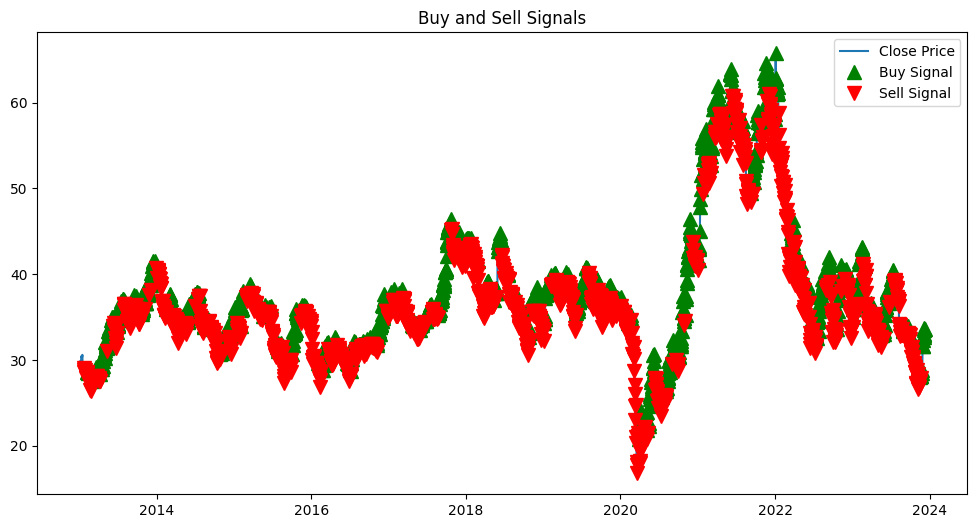

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Updated URLs with Raw file paths
url_GM_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_10years.csv'
url_GM_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_1year.csv'
url_GOOGL_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL-10years.csv'
url_GOOGL_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL_1year.csv'

# Read CSV files
data_GM_10years = pd.read_csv(url_GM_10years, parse_dates=['Date'], index_col='Date')

# Assuming 'data' is one of the datasets loaded, replace it with the desired data for analysis
data = data_GM_10years 
# Calculer la moyenne mobile sur 14 jours
data['SMA_14'] = data['Close'].rolling(window=14).mean()

# Créer une colonne pour stocker les signaux d'achat et de vente
data['Signal'] = 0  # 0: Pas de signal, 1: Signal d'achat, -1: Signal de vente

# Générer des signaux d'achat et de vente en fonction des croisements de la moyenne mobile
for i in range(14, len(data)):
    if data['Close'][i] > data['SMA_14'][i]:
        data['Signal'][i] = 1
    elif data['Close'][i] < data['SMA_14'][i]:
        data['Signal'][i] = -1

# Calculer les rendements
data['Stock_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy_Return'] = data['Signal'].shift(1) * data['Stock_Return']

# Calculer les rendements cumulés
data['Stock_Cumulative_Return'] = data['Stock_Return'].cumsum()
data['Strategy_Cumulative_Return'] = data['Strategy_Return'].cumsum()

# Calcul des statistiques
mean_return_stock = data['Stock_Return'].mean()
mean_return_strategy = data['Strategy_Return'].mean()
cumulative_return_stock = data['Stock_Cumulative_Return'].iloc[-1]
cumulative_return_strategy = data['Strategy_Cumulative_Return'].iloc[-1]
variance_stock = data['Stock_Return'].var()
variance_strategy = data['Strategy_Return'].var()
beta = data['Strategy_Return'].cov(data['Stock_Return']) / data['Stock_Return'].var()
sharpe_ratio_stock = (mean_return_stock - 0.02) / np.sqrt(variance_stock)  # Supposons que le taux sans risque soit de 0.02
sharpe_ratio_strategy = (mean_return_strategy - 0.02) / np.sqrt(variance_strategy)  # Supposons que le taux sans risque soit de 0.02
max_drawdown = (data['Stock_Cumulative_Return'] / data['Stock_Cumulative_Return'].cummax() - 1).min()

# Affichage des statistiques
print("Backtest Statistics:")
print(f"Mean Return (Stock): {mean_return_stock:.4f}")
print(f"Mean Return (Strategy): {mean_return_strategy:.4f}")
print(f"Cumulative Return (Stock): {cumulative_return_stock * 100:.2f}%")
print(f"Cumulative Return (Strategy): {cumulative_return_strategy * 100:.2f}%")
print(f"Variance (Stock): {variance_stock:.4f}")
print(f"Variance (Strategy): {variance_strategy:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio (Stock): {sharpe_ratio_stock:.4f}")
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot des signaux d'achat et de vente
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], marker='^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], marker='v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Buy and Sell Signals')
plt.legend()
plt.show()


# Partie 2 : Sur GM 1 an : pas risqué, CT

/tmp/ipykernel_8833/259266099.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][i] > data['SMA_14'][i]:
/tmp/ipykernel_8833/259266099.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['Close'][i] < data['SMA_14'][i]:
/tmp/ipykernel_8833/259266099.py:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermedi

Backtest Statistics:
Mean Return (Stock): -0.0000
Mean Return (Strategy): 0.0005
Cumulative Return (Stock): -0.71%
Cumulative Return (Strategy): 12.66%
Variance (Stock): 0.0005
Variance (Strategy): 0.0004
Beta: -0.2926
Sharpe Ratio (Stock): -0.9382
Sharpe Ratio (Strategy): -0.9425
Maximum Drawdown: -197.61%


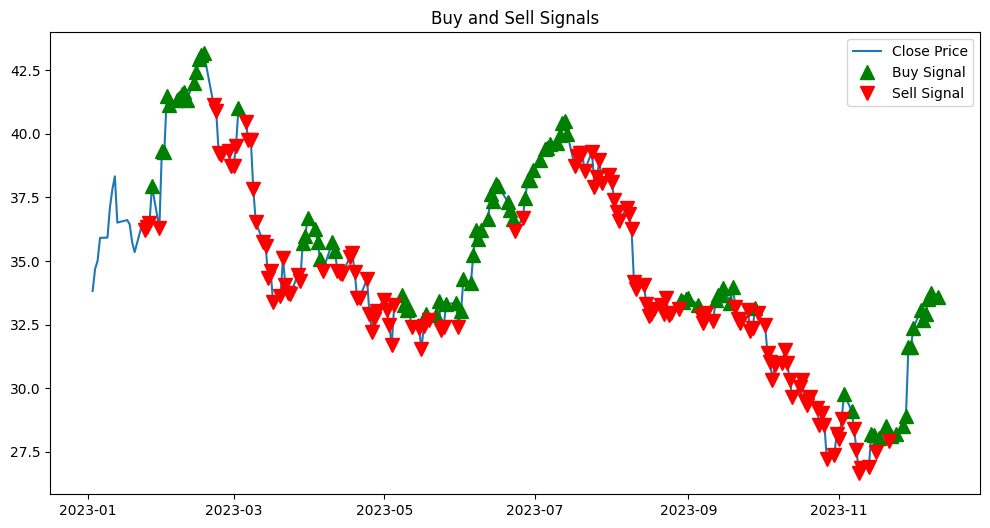

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Updated URLs with Raw file paths
url_GM_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_10years.csv'
url_GM_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GM_1year.csv'
url_GOOGL_10years = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL-10years.csv'
url_GOOGL_1year = 'https://raw.githubusercontent.com/Cosima2/Project-Python/main/GOOGL_1year.csv'

# Read CSV files
data_GM_1year = pd.read_csv(url_GM_1year, parse_dates=['Date'], index_col='Date')

# Assuming 'data' is one of the datasets loaded, replace it with the desired data for analysis
data = data_GM_1year
# Calculer la moyenne mobile sur 14 jours
data['SMA_14'] = data['Close'].rolling(window=14).mean()

# Créer une colonne pour stocker les signaux d'achat et de vente
data['Signal'] = 0  # 0: Pas de signal, 1: Signal d'achat, -1: Signal de vente

# Générer des signaux d'achat et de vente en fonction des croisements de la moyenne mobile
for i in range(14, len(data)):
    if data['Close'][i] > data['SMA_14'][i]:
        data['Signal'][i] = 1
    elif data['Close'][i] < data['SMA_14'][i]:
        data['Signal'][i] = -1

# Calculer les rendements
data['Stock_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy_Return'] = data['Signal'].shift(1) * data['Stock_Return']

# Calculer les rendements cumulés
data['Stock_Cumulative_Return'] = data['Stock_Return'].cumsum()
data['Strategy_Cumulative_Return'] = data['Strategy_Return'].cumsum()

# Calcul des statistiques
mean_return_stock = data['Stock_Return'].mean()
mean_return_strategy = data['Strategy_Return'].mean()
cumulative_return_stock = data['Stock_Cumulative_Return'].iloc[-1]
cumulative_return_strategy = data['Strategy_Cumulative_Return'].iloc[-1]
variance_stock = data['Stock_Return'].var()
variance_strategy = data['Strategy_Return'].var()
beta = data['Strategy_Return'].cov(data['Stock_Return']) / data['Stock_Return'].var()
sharpe_ratio_stock = (mean_return_stock - 0.02) / np.sqrt(variance_stock)  # Supposons que le taux sans risque soit de 0.02
sharpe_ratio_strategy = (mean_return_strategy - 0.02) / np.sqrt(variance_strategy)  # Supposons que le taux sans risque soit de 0.02
max_drawdown = (data['Stock_Cumulative_Return'] / data['Stock_Cumulative_Return'].cummax() - 1).min()

# Affichage des statistiques
print("Backtest Statistics:")
print(f"Mean Return (Stock): {mean_return_stock:.4f}")
print(f"Mean Return (Strategy): {mean_return_strategy:.4f}")
print(f"Cumulative Return (Stock): {cumulative_return_stock * 100:.2f}%")
print(f"Cumulative Return (Strategy): {cumulative_return_strategy * 100:.2f}%")
print(f"Variance (Stock): {variance_stock:.4f}")
print(f"Variance (Strategy): {variance_strategy:.4f}")
print(f"Beta: {beta:.4f}")
print(f"Sharpe Ratio (Stock): {sharpe_ratio_stock:.4f}")
print(f"Sharpe Ratio (Strategy): {sharpe_ratio_strategy:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

# Plot des signaux d'achat et de vente
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data[data['Signal'] == 1].index, data['Close'][data['Signal'] == 1], marker='^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data['Close'][data['Signal'] == -1], marker='v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Buy and Sell Signals')
plt.legend()
plt.show()
